### DBScan

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes

/content/drive/.shortcut-targets-by-id/1Rb0U_on_je-YZF0eGDbrcqcgLCDA0OtG/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
breast_cancer = pd.read_csv('PAM50Genes_ancestry_normalizedcounts_subtype.csv')

In [6]:
breast_cancer.head()

,sample,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,...,gene-UBE2T|UBE2T,gene-NUF2|NUF2,gene-NDC80|NDC80,gene-ORC6|ORC6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,...,630.678101,307.668641,561.644417,165.339935,LumB,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,...,668.050776,403.707670,578.138155,228.378058,LumB,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,...,220.005089,108.122159,127.866205,69.574259,LumB,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,...,181.923665,125.798279,139.345786,55.157707,LumB,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,...,196.111818,122.798989,122.798989,61.399494,LumB,0.0,0.336832,0.0,0.663168,0.0


In [7]:
breast_cancer['subtype'].value_counts()

Basal     115
LumB       61
LumA       56
Normal     46
Her2       45
Name: subtype, dtype: int64

In [8]:
#Eliminar valores nulos y sample column y todos los valores de probabilidad para los subtipos 
breast_cancer.dropna(axis=0, inplace=True)
breast_cancer= breast_cancer.drop('sample',axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Basal', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Her2', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumB', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumA', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Normal', axis=1)
breast_cancer= breast_cancer.drop('subtype', axis=1)

In [9]:
breast_cancer.head()

,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,K5.1,...,gene-RRM2|RRM2,gene-SFRP1|SFRP1,gene-SLC39A6|SLC39A6,gene-TMEM45B|TMEM45B,gene-TYMS|TYMS,gene-UBE2C|UBE2C,gene-UBE2T|UBE2T,gene-NUF2|NUF2,gene-NDC80|NDC80,gene-ORC6|ORC6
0,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,0.045163,...,761.075060,4.261339,5946.271774,63.920078,582.951110,642.609849,630.678101,307.668641,561.644417,165.339935
1,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,0.030383,...,847.876019,10.789515,6251.624560,51.250194,663.555145,613.204077,668.050776,403.707670,578.138155,228.378058
2,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,0.000010,...,445.651333,30.086166,10025.274610,35.727322,133.507361,429.668057,220.005089,108.122159,127.866205,69.574259
3,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,0.000010,...,464.485954,17.418223,9985.480335,29.998051,97.735586,403.522173,181.923665,125.798279,139.345786,55.157707
4,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,0.000010,...,425.214409,28.408721,10098.842225,27.492311,108.136423,382.143122,196.111818,122.798989,122.798989,61.399494


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
# Normalización de los datos
#scaler = StandardScaler()
#X = scaler.fit_transform(breast_cancer)
X = breast_cancer

In [12]:
# Selección de características utilizando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


In [13]:
# Definición de los parámetros
eps = 9 # Radio
min_samples = 5 # Número mínimo de puntos

In [14]:
# Ejecución del algoritmo
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

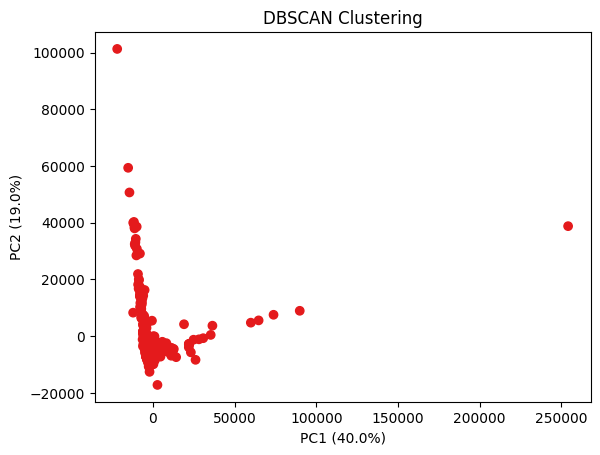

In [15]:
# Visualización de los grupos utilizando un gráfico de dispersión
# plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1')
plt.xlabel(f'PC1 ({100*pca.explained_variance_ratio_[0]:.1f}%)')
plt.ylabel(f'PC2 ({100*pca.explained_variance_ratio_[1]:.1f}%)')
plt.title('DBSCAN Clustering')
plt.show()


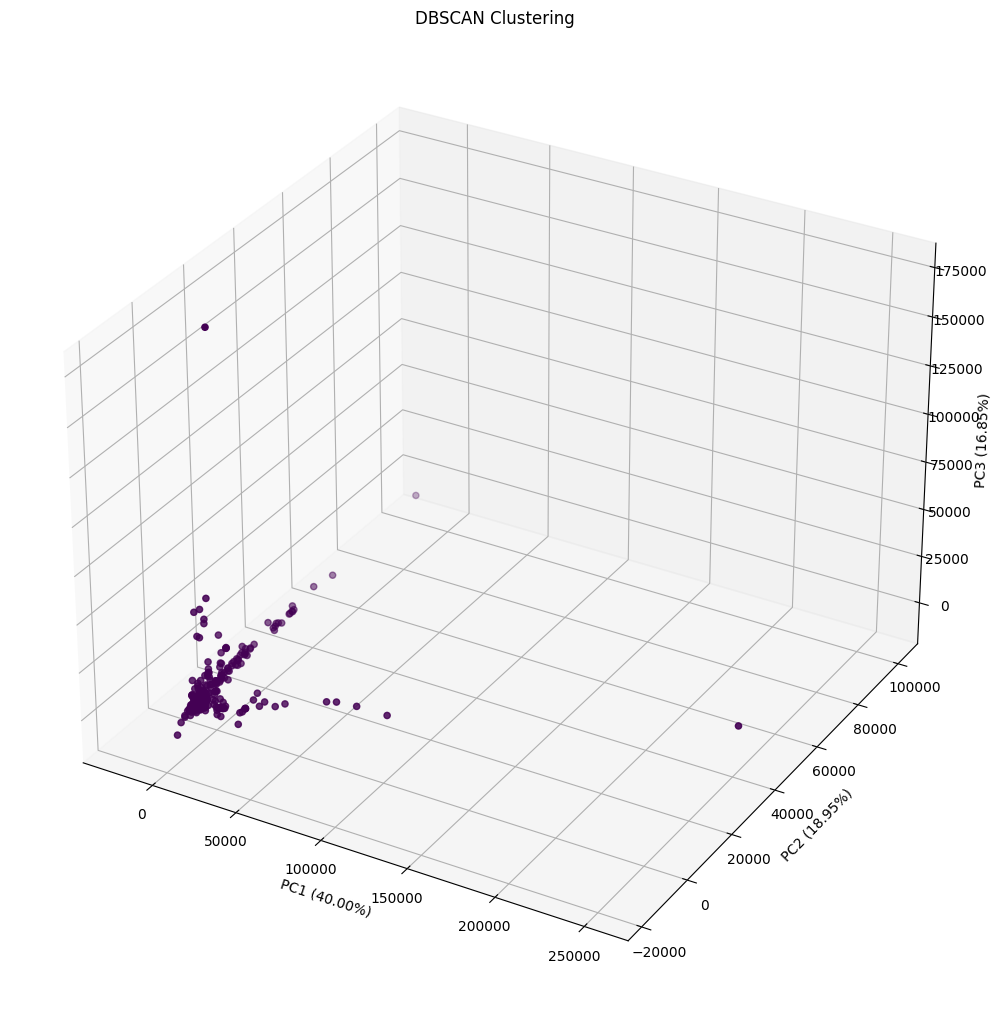

In [16]:
fig = plt.figure(figsize=(10, 50))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('DBSCAN Clustering')
plt.tight_layout()
plt.show()


In [17]:
import numpy as np

# Análisis de la estructura de los grupos
print('Número de grupos: ', len(np.unique(labels)))
print('Número de puntos ruidosos: ', np.sum(labels == -1))
print('Densidad media de los grupos: ', np.mean(np.bincount(labels[labels != -1])))


Número de grupos:  1
Número de puntos ruidosos:  323
Densidad media de los grupos:  nan


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


##Aumentando el numero de grupos

In [18]:
import numpy as np
from sklearn.cluster import DBSCAN

eps_list = [0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 1000]
min_samples_list = [5, 10, 15, 20, 30, 40, 50, 100, 200]

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        cluster_sizes = [np.sum(labels == i) for i in range(n_clusters)]
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters with sizes {cluster_sizes}")

eps=0.5, min_samples=5: 0 clusters with sizes []
eps=0.5, min_samples=10: 0 clusters with sizes []
eps=0.5, min_samples=15: 0 clusters with sizes []
eps=0.5, min_samples=20: 0 clusters with sizes []
eps=0.5, min_samples=30: 0 clusters with sizes []
eps=0.5, min_samples=40: 0 clusters with sizes []
eps=0.5, min_samples=50: 0 clusters with sizes []
eps=0.5, min_samples=100: 0 clusters with sizes []
eps=0.5, min_samples=200: 0 clusters with sizes []
eps=1, min_samples=5: 0 clusters with sizes []
eps=1, min_samples=10: 0 clusters with sizes []
eps=1, min_samples=15: 0 clusters with sizes []
eps=1, min_samples=20: 0 clusters with sizes []
eps=1, min_samples=30: 0 clusters with sizes []
eps=1, min_samples=40: 0 clusters with sizes []
eps=1, min_samples=50: 0 clusters with sizes []
eps=1, min_samples=100: 0 clusters with sizes []
eps=1, min_samples=200: 0 clusters with sizes []
eps=1.5, min_samples=5: 0 clusters with sizes []
eps=1.5, min_samples=10: 0 clusters with sizes []
eps=1.5, min_samp

##Imprimir el valor de PCA para eliminar outliers

In [ ]:
import pandas as pd 

# Crear un dataframe con los componentes principales
df_PCA = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Exportar el dataframe de componentes principales a un archivo CSV
df_PCA.to_csv('pca_mostVariantGenes_ancestry_normalizedcounts.csv', index=False)


### **Las muestras que desvían la variabilidad son SRR10804465 y SRR7012369 entonces las voy a quitar**

In [ ]:
breast_cancer_cleaned = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts_withoutSRR10804465_SRR7012369.csv')

In [ ]:
breast_cancer_cleaned.head()

,sample,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,...,0.0,443.17921,13.63628,33.23844,LumB,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,...,0.0,441.47100,10.78951,25.17553,LumB,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,...,0.0,257.61280,0.00000,39.48809,LumB,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,...,0.0,275.78854,11.61215,50.31931,LumB,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,...,0.0,252.92926,11.91333,43.98770,LumB,0.0,0.336832,0.0,0.663168,0.0


In [ ]:
breast_cancer_cleaned['subtype'].value_counts()

Basal     114
LumB       61
LumA       56
Her2       45
Normal     45
Name: subtype, dtype: int64

In [ ]:
#Eliminar valores nulos y sample column y todos los valores de probabilidad para los subtipos 
breast_cancer_cleaned.dropna(axis=0, inplace=True)
breast_cancer_cleaned= breast_cancer_cleaned.drop('sample',axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype.proba.Basal', axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype.proba.Her2', axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype.proba.LumB', axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype.proba.LumA', axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype.proba.Normal', axis=1)
breast_cancer_cleaned= breast_cancer_cleaned.drop('subtype', axis=1)

In [ ]:
# Selección de características utilizando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca_breastCancer = pca.fit_transform(breast_cancer_cleaned)
#escalado
scaler = StandardScaler()
X_pca_breastCancer = scaler.fit_transform(X_pca_breastCancer)

In [ ]:
# Definición de los parámetros
eps = 9 # Radio
min_samples = 5 # Número mínimo de puntos

In [ ]:
# Ejecución del algoritmo
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_pca_breastCancer)

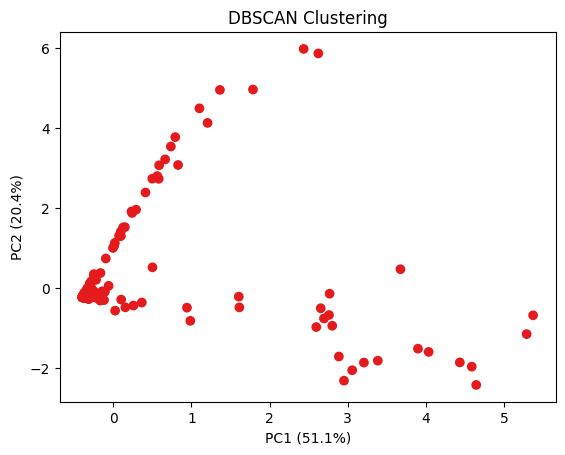

In [ ]:
# Visualización de los grupos utilizando un gráfico de dispersión
# plt.figure(figsize=(8, 8))
plt.scatter(X_pca_breastCancer[:, 0], X_pca_breastCancer[:, 1], c=labels, cmap='Set1')
plt.xlabel(f'PC1 ({100*pca.explained_variance_ratio_[0]:.1f}%)')
plt.ylabel(f'PC2 ({100*pca.explained_variance_ratio_[1]:.1f}%)')
plt.title('DBSCAN Clustering')
plt.show()

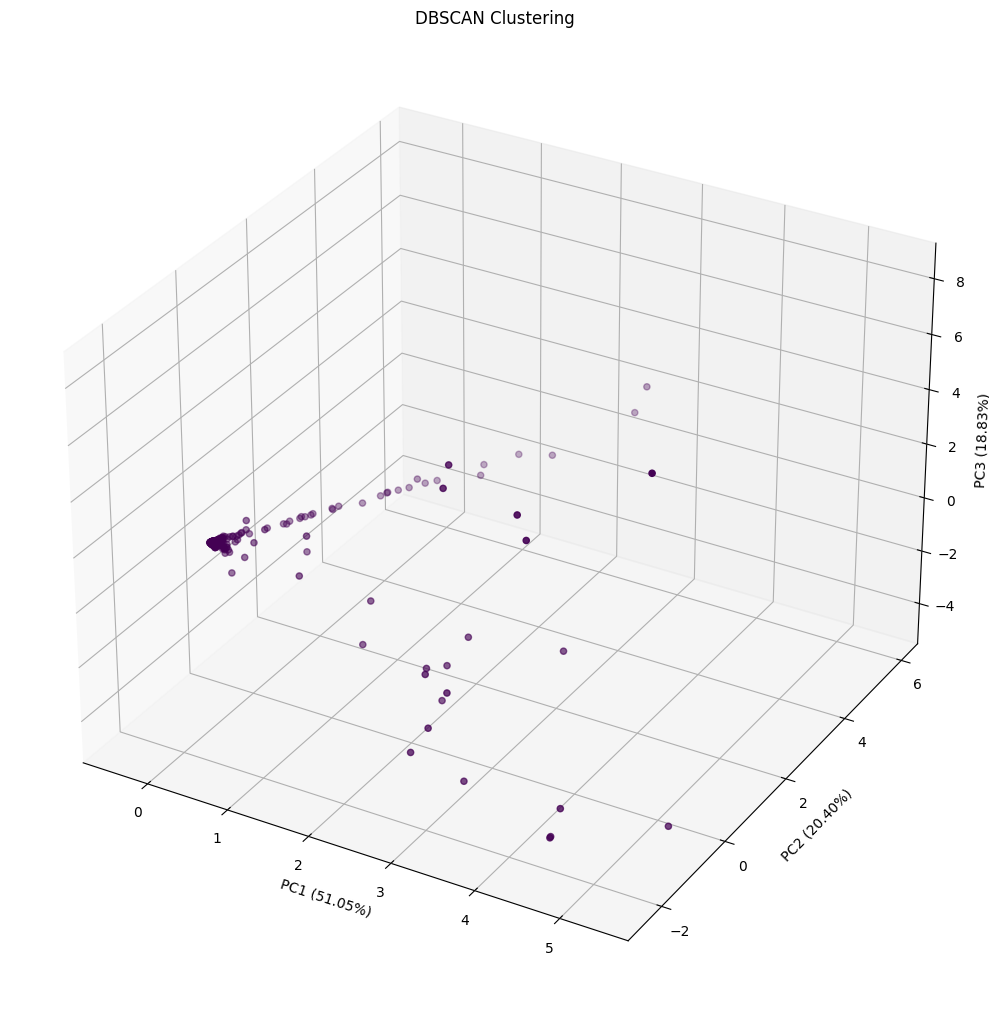

In [ ]:
fig = plt.figure(figsize=(10, 50))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_breastCancer[:, 0], X_pca_breastCancer[:, 1], X_pca_breastCancer[:, 2], c=labels, cmap='viridis')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('DBSCAN Clustering')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

eps_list = [0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 1000]
min_samples_list = [5, 10, 15, 20, 30, 40, 50, 100, 200]

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        cluster_sizes = [np.sum(labels == i) for i in range(n_clusters)]
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters with sizes {cluster_sizes}")

eps=0.5, min_samples=5: 0 clusters with sizes []
eps=0.5, min_samples=10: 0 clusters with sizes []
eps=0.5, min_samples=15: 0 clusters with sizes []
eps=0.5, min_samples=20: 0 clusters with sizes []
eps=0.5, min_samples=30: 0 clusters with sizes []
eps=0.5, min_samples=40: 0 clusters with sizes []
eps=0.5, min_samples=50: 0 clusters with sizes []
eps=0.5, min_samples=100: 0 clusters with sizes []
eps=0.5, min_samples=200: 0 clusters with sizes []
eps=1, min_samples=5: 0 clusters with sizes []
eps=1, min_samples=10: 0 clusters with sizes []
eps=1, min_samples=15: 0 clusters with sizes []
eps=1, min_samples=20: 0 clusters with sizes []
eps=1, min_samples=30: 0 clusters with sizes []
eps=1, min_samples=40: 0 clusters with sizes []
eps=1, min_samples=50: 0 clusters with sizes []
eps=1, min_samples=100: 0 clusters with sizes []
eps=1, min_samples=200: 0 clusters with sizes []
eps=1.5, min_samples=5: 0 clusters with sizes []
eps=1.5, min_samples=10: 0 clusters with sizes []
eps=1.5, min_samp